In [1]:
import os
from glob import glob
from pathlib import Path

import numpy as np
import pandas as pd

# Change to your data directory
basedir = Path('/Volumes/data-1/behavior/hakan')


## Figure 1C

### Load data


In [2]:
data_path = basedir/'Kucukdereli_atal_data/raw_behavior_data_females.h5'

female_data = pd.read_hdf(data_path, key='data')


In [4]:
female_data.head(5)

,indx,mouse,sex,date,experiment,day,time,dt,speed,position,session,cueid,habituation,stress,shocks,stim,neutral,dwell,explore,transition
0,0,HK120,female,211015,preference,1,0.000000,0.000000,0.000409,5.0,0,0,True,False,0,0,0,False,False,True
1,1,HK120,female,211015,preference,1,0.050087,0.050087,0.001117,5.0,0,0,True,False,0,0,0,False,False,True
2,2,HK120,female,211015,preference,1,0.100174,0.050087,0.003364,5.0,0,0,True,False,0,0,0,False,False,True
3,3,HK120,female,211015,preference,1,0.150260,0.050087,0.008946,5.0,0,0,True,False,0,0,0,False,False,True
4,4,HK120,female,211015,preference,1,0.200347,0.050087,0.021554,5.0,0,0,True,False,0,0,0,False,False,True


In [3]:
# Additional imports
import matplotlib.pyplot as plt

font = {'family' : 'sans',
        'weight' : 'regular',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('axes', linewidth=0.8)

colors = {'gray':'#D4D4D4', 'darkgray':'#545454', 
          'dwell':'#FF5E74', 'explore':'#00B7FF', 'transition':'#D4D4D4'}


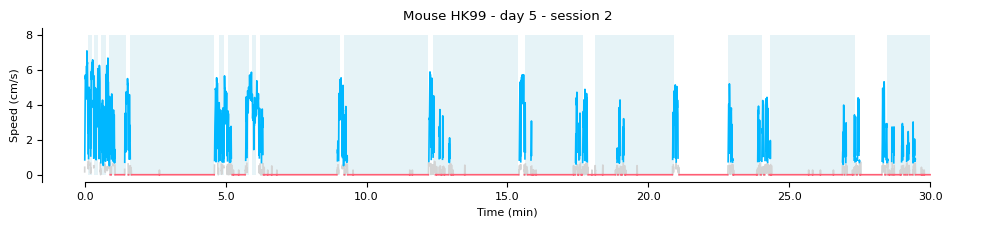

In [78]:
fig, ax = plt.subplots(1,1, figsize=(12,2))
df = female_data.query('mouse=="HK89" & experiment=="test_" & day==4 & session==1').copy()
time = df['time'].to_numpy()
for state in ['transition', 'dwell', 'explore']:
    speed = np.ones(df['speed'].to_numpy().shape) * np.nan
    speed[df[state]==True] = df[df[state]==True]['speed']

    ax.plot(time-time[0], speed, color=colors[state], lw=1.2)

ax.set_ylabel('Speed (cm/s)')
ax.set_xlabel('Time (min)')

ax.set_title(f'Mouse {mouse} - day {day} - session {session}')

ax.spines['bottom'].set_bounds(-1,8)
ax.set_yticks([0,2,4,6,8])

ax.spines['bottom'].set_bounds(0,time[-1]-time[0])
xticks = np.arange(0, time[-1]-time[0]+1, 5*60)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks/60)

ax.spines[['top', 'right']].set_visible(False)

stim_t = df.query('stim>0').groupby('cueid').apply(lambda x: x.iloc[0])['time'].to_numpy()
neutral_t = df.query('neutral>0').groupby('cueid').apply(lambda x: x.iloc[0])['time'].to_numpy()
if len(stim_t)==len(neutral_t):
    bounds = np.sort(np.concatenate([stim_t, neutral_t])).reshape(-1,2)
else:
    bounds = np.sort(np.concatenate([stim_t, neutral_t,time[[-1]]])).reshape(-1,2)

if stim_t[0]>neutral_t[0]:
    colorlist = np.tile(['white','lightblue'], np.ceil(len(bounds)/2).astype(int))
else:
    colorlist = np.tile(['lightblue','white'], np.ceil(len(bounds)/2).astype(int))
for j, bn in enumerate(bounds):
    ax.fill_betweenx([0,8], bn[0]-time[0], bn[1]-time[0], color=colorlist[j], alpha=0.3, lw=0)
